In [2]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def f(t, r):
    x, y = r
    fx = np.cos(y)
    fy = np.sin(x)
    return fx, fy

sol = integrate.solve_ivp(f, (0, 10), (1, 1), t_eval=np.linspace(0, 10, 100))

In [16]:
x, y = sol.y

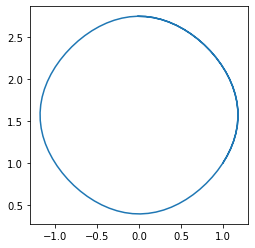

In [18]:
plt.plot(x, y)
plt.axis("scaled")
plt.show()

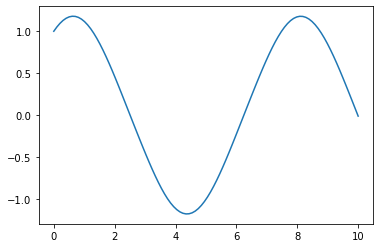

In [22]:
t = sol.t
plt.plot(t, x)
plt.show()

In [47]:
import simple_space_simulator.constants as constants
import simple_space_simulator.utils as utils

In [94]:
mass = 1 # kg
def acc(t, y):
    magnitude = constants.G * constants.M_EARTH * mass / (np.linalg.norm(y)) ** 2
    r = y / np.linalg.norm(y)
    return magnitude * r

In [95]:
vy = utils.circular_orbit_velocity(constants.ISS_ALTITUDE)
acc(0, np.array([constants.R_EARTH + constants.ISS_ALTITUDE,0]))

array([3.64930219, 0.        ])

In [96]:
sol = integrate.solve_ivp(acc, (0, 100), (0, vy))

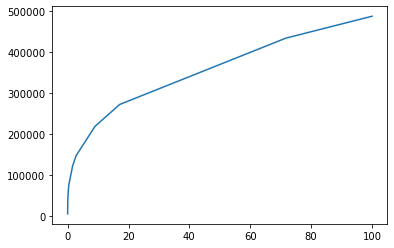

In [97]:
plt.plot(sol.t, sol.y[1])
plt.show()

In [102]:
# Projectile Motion Problem
g = 9.8
def acc(t, y):
    r = y[0] # position 
    v = y[1] # first derivative 
    return [v, -g] # acc independent of r

# m/s 
vy0 = 10

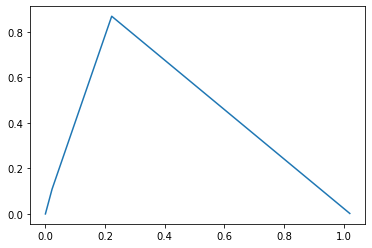

In [120]:
sol = integrate.solve_ivp(acc, (0, 1.02), (0, 5))
plt.plot(sol.t, sol.y[0])
plt.show()

In [121]:
# https://media.ed.ac.uk/media/Solving+Differential+Equations+in+PythonA+Higher+order+ODEs+with+solve_ivp/1_c8g7fwhw

In [223]:
mass = 1 # kg
def acc(t, y):
    pose = y[:2]
    vel = y[2:]
    magnitude = constants.G * constants.M_EARTH * mass / (np.linalg.norm(pose)) ** 2
    r = pose / np.linalg.norm(pose)
    acc = - magnitude * r
    return [vel[0], vel[1], acc[0], acc[1]]
vy = utils.circular_orbit_velocity(constants.ISS_ALTITUDE)

In [256]:
sol = integrate.solve_ivp(acc, (0, 100000), (constants.R_EARTH + constants.ISS_ALTITUDE, 0, 0, vy), t_eval = np.linspace(0, 20000, 100000), max_step=100)

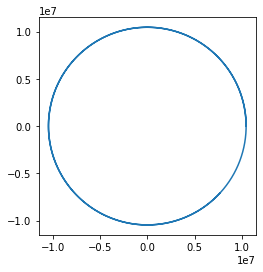

In [257]:
plt.plot(sol.y[0], sol.y[1])
plt.axis("scaled")
plt.show()

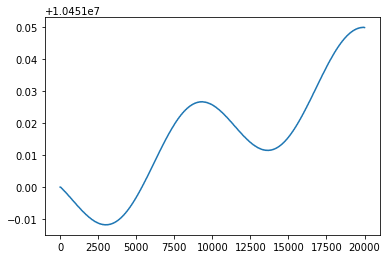

-0.04992748238146305


In [258]:
plt.plot(sol.t, np.linalg.norm(sol.y[:2], axis=0))
plt.show()
print(np.linalg.norm(sol.y[:2], axis=0)[0] - np.linalg.norm(sol.y[:2], axis=0)[-1])

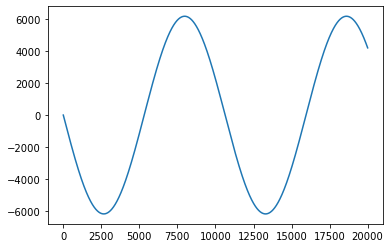

In [245]:
plt.plot(sol.t, sol.y[2])
plt.show()

In [ ]:
# https://www.marksmath.org/visualization/orbits/CentralOrbit.html

In [260]:
t = (1, 2, 3)
f = (4, 5, 6)
g = (*t, *f)

In [261]:
g

(1, 2, 3, 4, 5, 6)

In [262]:
t = np.array([1, 2, 3])
f = np.array([4, 5, 6])
g = (*t, *f)

In [263]:
g

(1, 2, 3, 4, 5, 6)

Test Rotational Dyanmics with RK45

Quaternion Reference Material (also see)

Rotations https://www.euclideanspace.com/physics/kinematics/angularvelocity/
Quaternions for rotational dynamics https://arxiv.org/pdf/0811.2889.pdf
https://math.stackexchange.com/questions/1896379/how-to-use-the-quaternion-derivative
https://math.stackexchange.com/questions/39553/how-do-i-apply-an-angular-velocity-vector3-to-a-unit-quaternion-orientation
https://math.stackexchange.com/questions/1792826/estimate-angular-velocity-and-acceleration-from-a-sequence-of-rotations
http://www.mare.ee/indrek/varphi/vardyn.pdf

In [417]:
def quaternion_multiply(quaternion1, quaternion0):
    w0, x0, y0, z0 = quaternion0
    w1, x1, y1, z1 = quaternion1
    return np.array([-x1*x0 - y1*y0 - z1*z0 + w1*w0,
                         x1*w0 + y1*z0 - z1*y0 + w1*x0,
                        -x1*z0 + y1*w0 + z1*x0 + w1*y0,
                         x1*y0 - y1*x0 + z1*w0 + w1*z0], dtype=np.float64)


def quaternion_conjugate(q):
    return np.array([q[0], -q[1], -q[2], -q[3]], dtype=np.float64)

def quaternion_inverse(q):
    return quaternion_conjugate(q) / np.linalg.norm(q) ** 2

In [418]:
def w_to_dq(q, w):
    return 

In [459]:
import scipy.spatial.transform as transform

# Rotations and Transformations http://www.continuummechanics.org/rotationmatrix.html
# Euler angles and aerospace coordinate systems https://apps.dtic.mil/dtic/tr/fulltext/u2/a484864.pdf
# Quaternions https://web.cs.iastate.edu/~cs577/handouts/quaternion.pdf


# (w, x, y, z)
# iniitial values
qinit = np.array([1, 0, 0, 0])
w = np.array([0, 0.0, 0.0, 0.0]) # angular velocity (0, x, y, z) as body rate
dqinit = 1/2 * quaternion_multiply(qinit, w)
dw = np.array([0, 0.0001, 0, 0.0]) # The body accelerations 
torque = np.array([0, 0, 0, 0])
I = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
def angular_velocity(t, y):
    q = y[:4]
    dq = y[4:9] # this is the quaternion derivative from the last time step
    w = quaternion_multiply(quaternion_inverse(q), 2*dq) 
    ddq = 1/2 * (quaternion_multiply(dq, w) + quaternion_multiply(q, dw)) # incorporate angular acceleration
    return (*dq, *ddq)

In [460]:
# (w, x, y, z)
sol = integrate.solve_ivp(angular_velocity, (0, 1000), (*qinit, *dqinit), t_eval = np.linspace(0, 1000, 1000), max_step=10)
print(sol.y.shape)

(8, 1000)


[1. 0. 0. 0. 0. 0. 0. 0.]
[ 3.14159265  0.         -0.2653331 ]


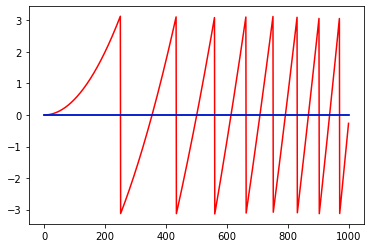

In [461]:
# Each row is a (possibly non-unit norm) quaternion in scalar-last (x, y, z, w) format
euler = np.array([transform.Rotation.from_quat([x[1], x[2], x[3], x[0]]).as_euler('xyz') for x in sol.y.T])
print(sol.y.T[0])
print(transform.Rotation.from_quat(sol.y.T[-1, :4]).as_euler('xyz'))


plt.plot(sol.t, euler[:, 0], color='red')
plt.plot(sol.t, euler[:, 1], color='green')
plt.plot(sol.t, euler[:, 2], color='blue')
plt.show()